In [64]:
import pandas as pd

def scrape_retention_metrics():
    df_possession = pd.read_html("https://fbref.com/en/comps/Big5/possession/players/Big-5-European-Leagues-Stats",
                    attrs={"id": "stats_possession"})[0]

    df_retention = df_possession[[
        ('Unnamed: 1_level_0', 'Player'),
        ('Unnamed: 4_level_0', 'Squad'),
        ('Unnamed: 3_level_0', 'Pos'),
        ('Unnamed: 8_level_0', '90s'),
        ('Take-Ons', 'Succ%'),
        ('Carries', 'Mis'),
        ('Carries', 'Dis')
    ]]



    df_misc = pd.read_html("https://fbref.com/en/comps/Big5/misc/players/Big-5-European-Leagues-Stats",
                    attrs={"id": "stats_misc"})[0]

    df_misc = df_misc[[('Unnamed: 1_level_0', 'Player'), ('Performance', 'Fld')]]

    df_retention = df_retention.merge(
        df_misc,
        left_on=[('Unnamed: 1_level_0', 'Player')],
        right_on=[('Unnamed: 1_level_0', 'Player')],
        how='left'
    )



    df_passing = pd.read_html("https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats",
                    attrs={"id": "stats_passing"})[0]


    df_pass_cmp = df_passing[[('Unnamed: 1_level_0', 'Player'), ('Total', 'Cmp%')]]

    df_retention = df_retention.merge(
        df_pass_cmp,
        left_on=[('Unnamed: 1_level_0', 'Player')],
        right_on=[('Unnamed: 1_level_0', 'Player')],
        how='left'
    )

    df_retention.columns = [
        "player",
        "team", 
        "position",
        "90s",
        "dribble_success_rate",
        "miscontrols",
        "dispossessed",
        "fouls_drawn",
        "pass_completion_rate"
    ]

    metrics_to_adjust = ['miscontrols', 'dispossessed', 'fouls_drawn', 'pass_completion_rate']
    df_retention['90s'] = pd.to_numeric(df_retention['90s'], errors='coerce')

    for metric in metrics_to_adjust:
            df_retention[metric] = pd.to_numeric(df_retention[metric], errors='coerce')
            df_retention[metric] = df_retention[metric] / df_retention['90s']

    return df_retention


def scrape_progression_metrics():

    df_passing = pd.read_html("https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats",
                        attrs={"id": "stats_passing"})[0]

    df_progression = df_passing[[
        ('Unnamed: 1_level_0', 'Player'),
        ('Unnamed: 4_level_0', 'Squad'),
        ('Unnamed: 3_level_0', 'Pos'),
        ('Unnamed: 8_level_0', '90s'),
        ('Total', 'PrgDist'),
        ('Unnamed: 31_level_0', 'PrgP'),
        ('Unnamed: 28_level_0', '1/3')
    ]]

    df_possession = pd.read_html("https://fbref.com/en/comps/Big5/possession/players/Big-5-European-Leagues-Stats",
                        attrs={"id": "stats_possession"})[0]

    df_possession = df_possession[[('Unnamed: 1_level_0', 'Player'), ('Carries', '1/3'), ('Carries', 'PrgDist'), ('Carries', 'PrgC')]]

    df_progression = df_progression.merge(
            df_possession,
            left_on=[('Unnamed: 1_level_0', 'Player')],
            right_on=[('Unnamed: 1_level_0', 'Player')],
            how='left'
        )
    
    df_progression.columns = [
        "player",
        "team", 
        "position",
        "90s",
        "pass_prog_dist",
        "prog_passes",
        "passes_final_third",
        "carries_final_third",
        "carries_prog_dist",
        "prog_carries"
    ]

    metrics_to_adjust = ['pass_prog_dist', 'prog_passes', 'passes_final_third', 'carries_final_third', 'carries_prog_dist', 'prog_carries']
    df_progression['90s'] = pd.to_numeric(df_progression['90s'], errors='coerce')

    for metric in metrics_to_adjust:
            df_progression[metric] = pd.to_numeric(df_progression[metric], errors='coerce')
            df_progression[metric] = df_progression[metric] / df_progression['90s']

    return df_progression


def scrape_def_actions_metrics():

    df_def_act = pd.read_html("https://fbref.com/en/comps/Big5/defense/players/Big-5-European-Leagues-Stats",
                            attrs={"id": "stats_defense"})[0]

    df_ball_winning = df_def_act[[
        ('Unnamed: 1_level_0', 'Player'),
        ('Unnamed: 4_level_0', 'Squad'),
        ('Unnamed: 3_level_0', 'Pos'),
        ('Unnamed: 8_level_0', '90s'),
        ('Tackles', 'Tkl'),
        ('Unnamed: 21_level_0', 'Int'),
        ('Challenges', 'Tkl%'),
        ('Unnamed: 24_level_0', 'Err'),
    ]]

    df_misc = pd.read_html("https://fbref.com/en/comps/Big5/misc/players/Big-5-European-Leagues-Stats",
                        attrs={"id": "stats_misc"})[0]

    df_misc = df_misc[[('Unnamed: 1_level_0', 'Player'), ('Performance', 'Fls'), ('Performance', 'Recov')]]

    df_ball_winning = df_ball_winning.merge(
            df_misc,
            left_on=[('Unnamed: 1_level_0', 'Player')],
            right_on=[('Unnamed: 1_level_0', 'Player')],
            how='left'
        )

    df_ball_winning.columns = [
            "player",
            "team", 
            "position",
            "90s",
            "tackles",
            "interceptions",
            "tackle_win_rate",
            "errors",
            "fouls_committed",
            "ball_recoveries"
        ]

    df_team_stats_25 = pd.read_html("https://fbref.com/en/comps/Big5/stats/squads/Big-5-European-Leagues-Stats",
                        attrs={"id": "stats_teams_standard_for"})[0]

    df_team_stats_25 = df_team_stats_25[[('Unnamed: 1_level_0', 'Squad'), ('Unnamed: 5_level_0', 'Poss')]]

    # df_team_stats_24 = pd.read_html("https://fbref.com/en/comps/Big5/2023-2024/stats/squads/2023-2024-Big-5-European-Leagues-Stats",
    #                     attrs={"id": "stats_teams_standard_for"})[0]

    # df_team_stats_24 = df_team_stats_24[[('Unnamed: 1_level_0', 'Squad'), ('Unnamed: 5_level_0', 'Poss')]]

    # df_team_stats_25.columns = ['Squad', 'Poss_25']
    # df_team_stats_24.columns = ['Squad', 'Poss_24']

    # df_team_poss = df_team_stats_25.merge(
    #     df_team_stats_24,
    #     on='Squad',
    #     how='outer' 
    # )

    # df_team_poss['Avg_Poss'] = df_team_poss[['Poss_24', 'Poss_25']].mean(axis=1)
    # df_team_poss['Avg_Poss'] = df_team_poss['Avg_Poss'].round(1)
    df_team_stats_25.columns = ['Squad', 'Poss']
    df_team_poss_final = df_team_stats_25[['Squad', 'Poss']]

    df_ball_winning = df_ball_winning.merge(
        df_team_poss_final,
        left_on='team',
        right_on='Squad',
        how='left'
    )


    df_ball_winning['tackles'] = pd.to_numeric(df_ball_winning['tackles'], errors='coerce')
    df_ball_winning['interceptions'] = pd.to_numeric(df_ball_winning['interceptions'], errors='coerce')
    df_ball_winning['pos_adj_tck'] = (df_ball_winning['tackles']) * (100 / df_ball_winning['Poss'])
    df_ball_winning['pos_adj_int'] = (df_ball_winning['interceptions']) * (100 / df_ball_winning['Poss'])

    df_ball_winning = df_ball_winning.drop(['tackles', 'interceptions', 'Squad'], axis=1)

    metrics_to_adjust = ['pos_adj_tck', 'pos_adj_int', 'errors', 'fouls_committed', 'ball_recoveries']
    df_ball_winning['90s'] = pd.to_numeric(df_ball_winning['90s'], errors='coerce')

    for metric in metrics_to_adjust:
            df_ball_winning[metric] = pd.to_numeric(df_ball_winning[metric], errors='coerce')
            df_ball_winning[metric] = df_ball_winning[metric] / df_ball_winning['90s']


    return df_ball_winning

import time
df_retention = scrape_retention_metrics()
time.sleep(5)
df_progression = scrape_progression_metrics()
time.sleep(5)
df_ball_winning = scrape_def_actions_metrics()



print(f"Retention players: {len(df_retention)}, Unique players: {len(df_retention['player'].unique())}")
print(f"Progression players: {len(df_progression)}, Unique players: {len(df_progression['player'].unique())}")
print(f"Ball winning players: {len(df_ball_winning)}, Unique players: {len(df_ball_winning['player'].unique())}")

df_retention = df_retention.drop_duplicates(subset='player')
df_progression = df_progression.drop_duplicates(subset='player')
df_ball_winning = df_ball_winning.drop_duplicates(subset='player')

df = df_retention.merge(
    df_progression,
    on='player',
    how='outer'
).merge(
    df_ball_winning,
    on='player',
    how='outer'
)

cols_to_drop = [col for col in df.columns if '_x' in col or '_y' in col]
df = df.drop(cols_to_drop, axis=1)


Retention players: 859950, Unique players: 2359
Progression players: 11476, Unique players: 2359
Ball winning players: 11476, Unique players: 2359


In [65]:
df = df[df["position"].str.contains('mf', case=False)]
df = df[df["90s"] > 5]
df["dribble_success_rate"] = pd.to_numeric(df["dribble_success_rate"], errors="coerce")
df["tackle_win_rate"] = pd.to_numeric(df["tackle_win_rate"], errors="coerce")
df = df.drop(["Poss"], axis=1)

df.shape

(622, 21)

In [66]:
higher_better = ['dribble_success_rate', 'pass_completion_rate', 'pass_prog_dist', 
                 'prog_passes', 'passes_final_third', 'carries_final_third', "prog_carries",
                 'tackle_win_rate', 'ball_recoveries', "fouls_drawn", "carries_prog_dist", "pos_adj_tck"
                 ,"pos_adj_int" ]

lower_better = ['miscontrols', 'dispossessed', 'errors', 'fouls_committed']

percentile_df = pd.DataFrame()

# ranking higher better
for col in higher_better:
    percentile_df[col] = df[col].rank(method='min', pct=True).round(2)

# ranking lower better
for col in lower_better:
    percentile_df[col] = (1 - df[col].rank(method='min', pct=True)).round(2)

percentile_df = percentile_df.multiply(100)

percentile_df["player"] = df["player"]
percentile_df['team'] = df['team']
percentile_df['position'] = df['position']

percentile_df.columns

Index(['dribble_success_rate', 'pass_completion_rate', 'pass_prog_dist',
       'prog_passes', 'passes_final_third', 'carries_final_third',
       'prog_carries', 'tackle_win_rate', 'ball_recoveries', 'fouls_drawn',
       'carries_prog_dist', 'pos_adj_tck', 'pos_adj_int', 'miscontrols',
       'dispossessed', 'errors', 'fouls_committed', 'player', 'team',
       'position'],
      dtype='object')

In [67]:
combined_percentile_df = percentile_df[["player", "team"]]

combined_percentile_df["ball_retention_score"] = percentile_df[["pass_completion_rate", "dribble_success_rate", "miscontrols", "dispossessed", "errors", "fouls_drawn"]].mean(axis=1)
combined_percentile_df['ball_retention_score_percentile'] = combined_percentile_df['ball_retention_score'].rank(method='min', pct=True) * 100

combined_percentile_df["ball_winning_score"] = percentile_df[["tackle_win_rate", "ball_recoveries", "pos_adj_tck", "pos_adj_int", "fouls_committed"]].mean(axis=1)
combined_percentile_df['ball_winning_score_percentile'] = combined_percentile_df['ball_winning_score'].rank(method='min', pct=True) * 100

combined_percentile_df["ball_progression_score"] = percentile_df[["pass_prog_dist", "prog_passes", "passes_final_third", "carries_final_third", "prog_carries", "carries_prog_dist"]].mean(axis=1)
combined_percentile_df['ball_progression_score_percentile'] = combined_percentile_df['ball_progression_score'].rank(method='min', pct=True) * 100



C:\Users\Owner\AppData\Local\Temp\ipykernel_23416\1841349985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_percentile_df["ball_retention_score"] = percentile_df[["pass_completion_rate", "dribble_success_rate", "miscontrols", "dispossessed", "errors", "fouls_drawn"]].mean(axis=1)
C:\Users\Owner\AppData\Local\Temp\ipykernel_23416\1841349985.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_percentile_df['ball_retention_score_percentile'] = combined_percentile_df['ball_retention_score

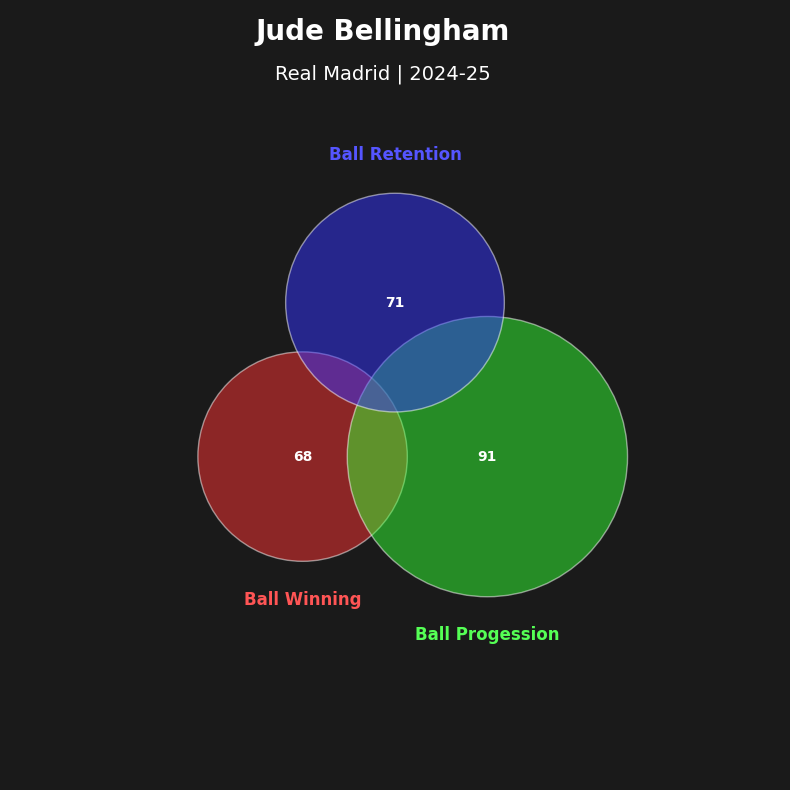

In [120]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle

def create_venn_diagram(df, player_name):
    try:
        player_scores = [
            int(df.loc[df['player'] == player_name, 'ball_winning_score_percentile'].iloc[0].round(0)),
            int(df.loc[df['player'] == player_name, 'ball_progression_score_percentile'].iloc[0].round(0)),
            int(df.loc[df['player'] == player_name, 'ball_retention_score_percentile'].iloc[0].round(0))
        ]
        player_team = df.loc[df['player'] == player_name, 'team'].iloc[0]
    except IndexError:
        raise ValueError(f"Player {player_name} not found in DataFrame")
                         

    if not all(0 <= score <= 100 for score in player_scores):
        raise ValueError("All player_scores must be between 1 and 100")
    
    # Create figure and axis with dark background
    plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize=(10, 10))
    fig.patch.set_facecolor('#1a1a1a')  # Dark grey background
    ax.set_facecolor('#1a1a1a')
    
    # Calculate radii based on player_scores
    radii = [score/500 for score in player_scores]
    
    # Centers positioned in a tighter equilateral triangle for proper overlap
    centers = [
        (0.5 - 0.12, 0.5 - 0.08),             # Bottom left
        (0.5 + 0.12, 0.5 - 0.08),             # Bottom right
        (0.5, 0.5 + 0.12)                      # Top
    ]
    
    # Colors for circles and labels (brighter colors for dark mode)
    colors = ['#ff333366', '#33ff3366', '#3333ff66']  # Semi-transparent RGB for circles
    label_colors = ['#ff5555', '#55ff55', '#5555ff']  # Brighter RGB for labels
    circle_labels = ['Ball Winning', 'Ball Progession', 'Ball Retention']
    
    # Create and add circles individually for proper overlap
    for center, radius, color in zip(centers, radii, colors):
        circle = Circle(center, radius, facecolor=color, edgecolor='white', alpha=0.5)
        ax.add_patch(circle)
    
    # Calculate label positions based on circle sizes
    margin = 0.05  # Additional margin from circle edge
    label_positions = [
        (0.5 - 0.12, centers[0][1] - radii[0] - margin),    # Below left circle
        (0.5 + 0.12, centers[1][1] - radii[1] - margin),    # Below right circle
        (0.5, centers[2][1] + radii[2] + margin)            # Above top circle
    ]
    
    for pos, label, color in zip(label_positions, circle_labels, label_colors):
        ax.text(pos[0], pos[1], label,
                color=color,
                horizontalalignment='center',
                verticalalignment='center',
                fontweight='bold',
                fontsize=12)
    
    # Set plot limits and aspect ratio
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    
    # Remove axes for cleaner look
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    # Add player_scores as labels in white
    for i, (center, score) in enumerate(zip(centers, player_scores)):
        ax.text(center[0], center[1], f'{score}', 
                color='white',
                horizontalalignment='center',
                verticalalignment='center',
                fontweight='bold')
    
    fig.text(0.5, 0.85, f'{player_name}', 
         color='white', 
         fontsize=20, 
         fontweight='bold', 
         horizontalalignment='center')

    fig.text(0.5, 0.81, f'{player_team} | 2024-25', 
            color='white', 
            fontsize=14, 
            horizontalalignment='center')
    plt.show()


create_venn_diagram(combined_percentile_df, "Jude Bellingham")